In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
img = cv2.imread('./images/sharapova1.jpg')
img.shape

(555, 700, 3)

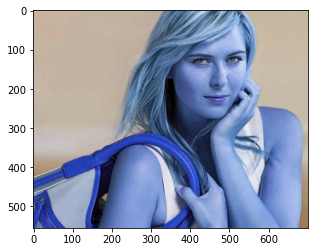

In [21]:
plt.imshow(img)

In [27]:
iimg = cv2.imread('./images/maria.jpg')
iimg.shape

(1820, 1264, 3)

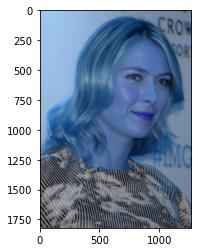

In [28]:
plt.imshow(iimg)

In [30]:
#import pywt

In [32]:
gr = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gr.shape

(555, 700)

In [34]:
gr 

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

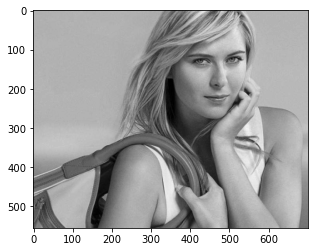

In [35]:
plt.imshow(gr,cmap='gray')

In [42]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gr, 1.3, 5)
faces

array([[352,  38, 233, 233]])

In [43]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

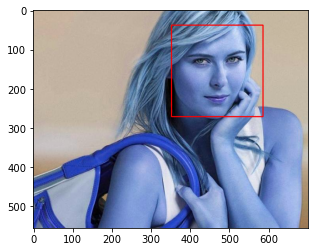

In [44]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

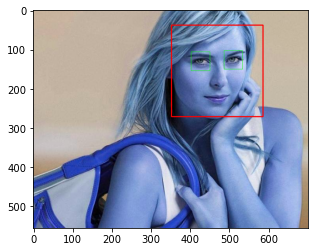

In [48]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gr[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0))

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()
        
        
    

# Crop the facial region of the image

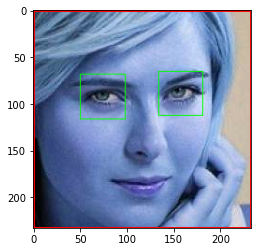

In [49]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [51]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

In [58]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

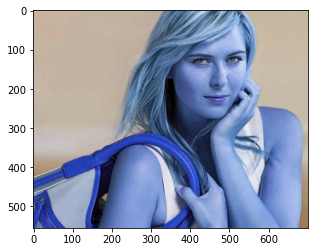

In [59]:
ori_img = cv2.imread('./images/sharapova1.jpg')
plt.imshow(ori_img)

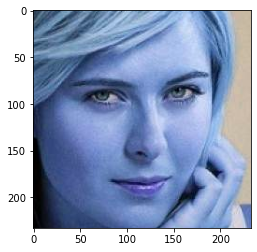

In [60]:
crop_img = get_cropped_image('./images/sharapova1.jpg')
plt.imshow(crop_img)

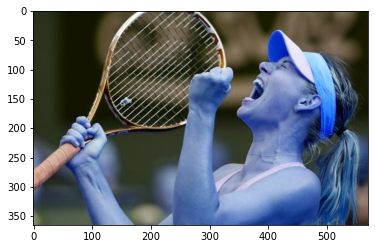

In [61]:
img_obs = cv2.imread('./images/sharapova2.jpg')
plt.imshow(img_obs)

In [64]:
crp_img_no2 = get_cropped_image('./images/sharapova2.jpg')
crp_img_no2

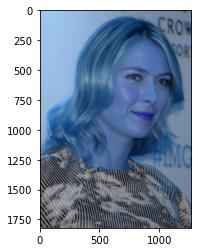

In [65]:
img_3 = cv2.imread('./images/maria.jpg')
plt.imshow(img_3)

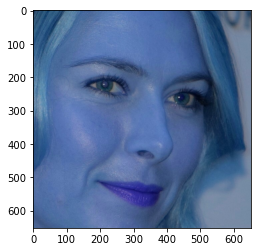

In [67]:
crp_img_no3 = get_cropped_image('./images/maria.jpg')
plt.imshow(crp_img_no3)

In [68]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [70]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [71]:
img_dirs

['./datasets/Messi',
 './datasets/Roger',
 './datasets/Serena',
 './datasets/sharapova',
 './datasets/Virat']

In [72]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [78]:
cropped_img_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count=1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("generating cropped images in folder :",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count = count+1

Messi
generating cropped images in folder : ./datasets/cropped/Messi
Roger
generating cropped images in folder : ./datasets/cropped/Roger
Serena
generating cropped images in folder : ./datasets/cropped/Serena
sharapova
generating cropped images in folder : ./datasets/cropped/sharapova
Virat
generating cropped images in folder : ./datasets/cropped/Virat


# Wavelet Transform

In [79]:
import pywt

In [85]:
def w2d(img,mode='haar', level=1):
    imArray = img
    #datatype conversion
    #convert to gray scale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    #CONVERT TO FLOAT
    imArray = np.float32(imArray)
    imArray /= 255
    # COMPUTE COEFFICIENT
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # Process Coefficient
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

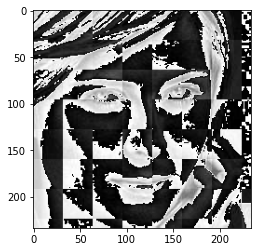

In [86]:
im_har = w2d(crop_img,'db1',5)
plt.imshow(im_har,cmap = 'gray')

In [87]:
celebrity_file_names_dict

{'Messi': ['./datasets/cropped/Messi/Messi1.png',
  './datasets/cropped/Messi/Messi2.png',
  './datasets/cropped/Messi/Messi3.png',
  './datasets/cropped/Messi/Messi4.png',
  './datasets/cropped/Messi/Messi5.png',
  './datasets/cropped/Messi/Messi6.png',
  './datasets/cropped/Messi/Messi7.png',
  './datasets/cropped/Messi/Messi8.png',
  './datasets/cropped/Messi/Messi9.png',
  './datasets/cropped/Messi/Messi10.png',
  './datasets/cropped/Messi/Messi11.png',
  './datasets/cropped/Messi/Messi12.png',
  './datasets/cropped/Messi/Messi13.png',
  './datasets/cropped/Messi/Messi14.png',
  './datasets/cropped/Messi/Messi15.png',
  './datasets/cropped/Messi/Messi16.png',
  './datasets/cropped/Messi/Messi17.png',
  './datasets/cropped/Messi/Messi18.png',
  './datasets/cropped/Messi/Messi19.png',
  './datasets/cropped/Messi/Messi20.png',
  './datasets/cropped/Messi/Messi21.png',
  './datasets/cropped/Messi/Messi22.png',
  './datasets/cropped/Messi/Messi23.png',
  './datasets/cropped/Messi/Messi2

In [88]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict    

{'Messi': 0, 'Roger': 1, 'Serena': 2, 'sharapova': 3, 'Virat': 4}

In [90]:
X = []
y = []
for celebrity_name , training_files in celebrity_file_names_dict.items() :
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
    

In [91]:
len(X[0])

4096

In [97]:
X.shape

(154, 4096)

In [94]:
32*32*3 + 32*32

4096

In [95]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [238],
       [232],
       [230]], dtype=uint8)

In [96]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(154, 4096)

In [98]:
X[0]

array([100., 129., 140., ..., 238., 232., 230.])

# Training Model

In [99]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
pipe = Pipeline([('scaler',StandardScaler()),('svc', SVC(kernel ='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8717948717948718

In [101]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       1.00      0.83      0.91         6
           2       0.60      0.75      0.67         4
           3       0.91      0.91      0.91        11
           4       0.89      0.89      0.89         9

    accuracy                           0.87        39
   macro avg       0.86      0.85      0.85        39
weighted avg       0.88      0.87      0.87        39



In [102]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [103]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [104]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.817391,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.678261,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.843478,{'logisticregression__C': 1}


In [106]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [107]:
best_estimators['svm'].score(X_test,y_test)

0.8461538461538461

In [108]:
best_estimators['random_forest'].score(X_test,y_test)

0.5897435897435898

In [109]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8717948717948718

In [110]:
best_clf = best_estimators['svm']

In [111]:


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm



array([[ 8,  0,  1,  0,  0],
       [ 0,  4,  2,  0,  0],
       [ 0,  0,  3,  0,  1],
       [ 1,  0,  0, 10,  0],
       [ 0,  0,  0,  1,  8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

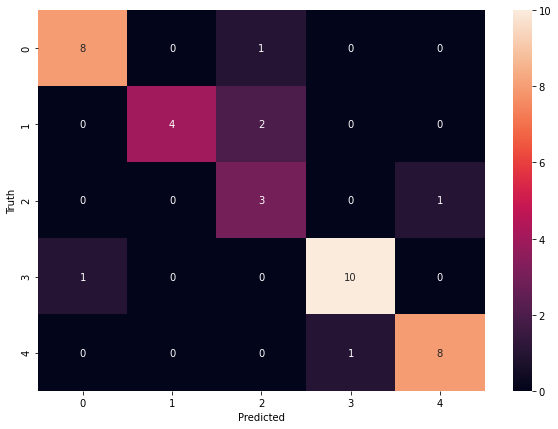

In [112]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [113]:
import joblib

In [114]:
joblib.dump(best_clf, 'saved_modell.pkl')

['saved_modell.pkl']

In [115]:
import json

In [116]:
with open("klass_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))